In [ ]:
import numpy as np
import pandas as pd
from time import time,sleep
from random import randint as r
import random
import matplotlib.pyplot as plt
import seaborn as sns
import time
import math

#### Generate Coordinates

In [ ]:
min_x = int(-2*np.pi*10000)
max_x = int(2*np.pi*10000)
min_y = int(-1.1*10000)
max_y = int(1.1*10000)
x = np.random.randint(min_x, max_x, (1,1000))/10000
y = np.random.randint(min_y, max_y, (1,1000))/10000
coord = pd.DataFrame()
x_df= pd.DataFrame(x.T, columns=['x'])
y_df= pd.DataFrame(y.T, columns=['y'])
coord = pd.concat([x_df,y_df], axis =1)

In [3]:
# target = (y_df['y'] > np.sin(x_df["x"]))*1)
target = (y > np.sin(x)*1).T

In [4]:
from sklearn import svm, datasets

svm_class = svm.SVC(kernel='rbf', C=100, gamma=0.5)
svm_class = svm_class.fit(coord, target)

C:\Users\MSI\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [5]:
# Generate a set of points that form a grid over feature space
xs = np.linspace(np.min(x), np.max(x), 600)
ys = np.linspace(np.min(y), np.max(y), 600)
points = np.array([[x1, y1] for x1 in xs for y1 in ys])

# Compute decision function for each point, keep those which are close to the boundary
dist_bias = svm_class.decision_function(points)
bounds_bias = np.array([pt for pt, dist in zip(points, dist_bias) if abs(dist)<0.1])


In [ ]:
sns.set()
fig, ax1 = plt.subplots(figsize=[16, 10], nrows=1, ncols=1)

ax1.scatter(x, y, color=["g" if t == 0 else "m" for t in target], label="Data Points")
ax1.scatter(x.T[svm_class.support_], y.T[svm_class.support_], color="r", label="Support Vectors")
ax1.scatter(bounds_bias[:, 0], bounds_bias[:, 1], color="black", s=1, label="Decision Boundary")
# ax1.set_title("Underfit SVM with Gaussian Kernel")
ax1.legend(loc='best',framealpha = 0.9, facecolor='w',fontsize='medium',
                ncol=1, fancybox=False, shadow=False)
ax1.set(xlabel='X', ylabel='Y')

plt.savefig('SVM Q3 Train Set Chris.png',bbox_inches = 'tight');

In [6]:
x_test = np.random.randint(min_x, max_x, (1,1000))/10000
y_test = np.random.randint(min_y, max_y, (1,1000))/10000
coord_test = pd.DataFrame()
x_test_df= pd.DataFrame(x_test.T, columns=['x'])
y_test_df= pd.DataFrame(y_test.T, columns=['y'])
coord_test = pd.concat([x_test_df,y_test_df], axis =1)

In [7]:
# target_test = pd.DataFrame(((y_test > np.sin(x_test))*1).T)
# target_test = target.rename(columns ={0 : 'target'})

In [8]:
target_test = (y_test > np.sin(x_test)*1)

In [9]:
svm_pred = svm_class.predict(coord_test)

In [10]:
coord_test['pred'] = svm_pred

In [11]:
coord_test['target_test'] = target_test.T

In [12]:
coord_test['incorrect'] = (coord_test['target_test'] !=coord_test['pred'])

In [13]:
coord_test

,x,y,pred,target_test,incorrect
0,-5.4439,0.1628,False,False,False
1,0.1350,1.0131,True,True,False
2,4.6560,0.6436,True,True,False
3,4.9269,0.7800,True,True,False
4,5.4937,0.6528,True,True,False
...,...,...,...,...,...
995,-5.0226,-0.5741,False,False,False
996,5.9442,-1.0982,False,False,False
997,4.6830,-0.2092,True,True,False
998,-5.5830,0.7421,True,True,False


In [14]:
incorrect = coord_test[coord_test['incorrect'] == True]

In [15]:
incorrect

,x,y,pred,target_test,incorrect
9,5.8544,-0.3261,False,True,True
16,0.9703,0.8561,False,True,True
40,-2.3549,-0.7301,True,False,True
107,4.6123,-0.9452,False,True,True
248,-0.9046,-0.7911,True,False,True
273,-4.1054,0.8099,True,False,True
274,3.0173,0.1627,False,True,True
293,-6.1773,0.1272,False,True,True
320,2.1520,0.8353,True,False,True
375,3.5749,-0.4329,True,False,True


In [16]:
# Generate a set of points that form a grid over feature space
xs = np.linspace(np.min(x_test), np.max(x_test), 600)
ys = np.linspace(np.min(y_test), np.max(y_test), 600)
points = np.array([[x1, y1] for x1 in xs for y1 in ys])

# Compute decision function for each point, keep those which are close to the boundary
dist_bias = svm_class.decision_function(points)
bounds_bias = np.array([pt for pt, dist in zip(points, dist_bias) if abs(dist)<0.1])


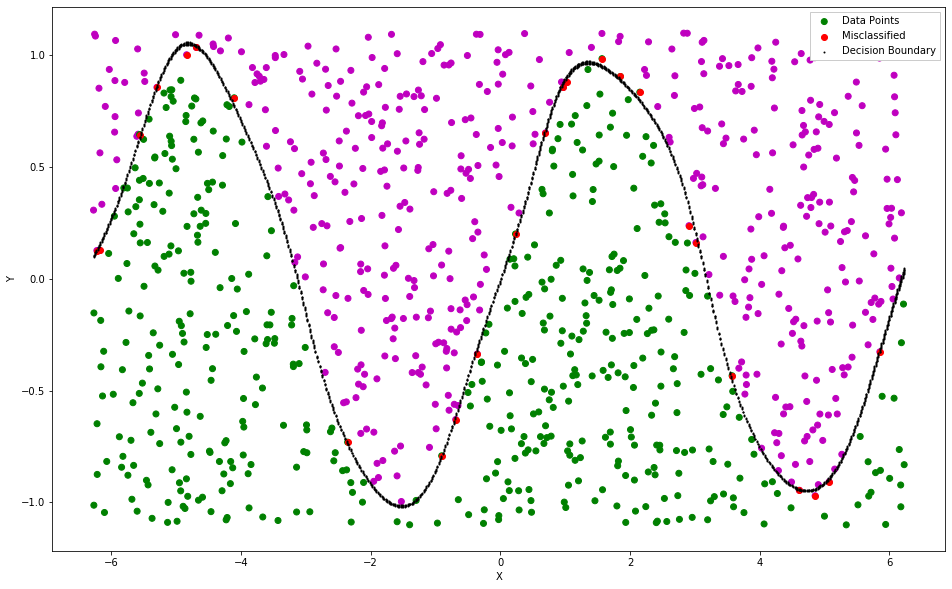

In [17]:
# sns.set()
fig, ax1 = plt.subplots(figsize=[16, 10], nrows=1, ncols=1)

# ax1.scatter(x_test, y_test, color=["r" if t == 0 else "b" for t in target_test], label="data")
ax1.scatter(x_test, y_test, color=["g" if t == 0 else "m" for t in target_test.T], label="Data Points")
ax1.scatter(incorrect['x'], incorrect['y'], color="r", label="Misclassified")
ax1.scatter(bounds_bias[:, 0], bounds_bias[:, 1], color="black", s=1, label="Decision Boundary")
# ax1.set_title("Underfit SVM with Gaussian Kernel")
ax1.legend(loc='upper right',framealpha = 1, facecolor='w',fontsize='medium',
                ncol=1, fancybox=False, shadow=False)
ax1.set(xlabel='X', ylabel='Y')

plt.savefig('SVM Q3 Test Set Chris.png',bbox_inches = 'tight');

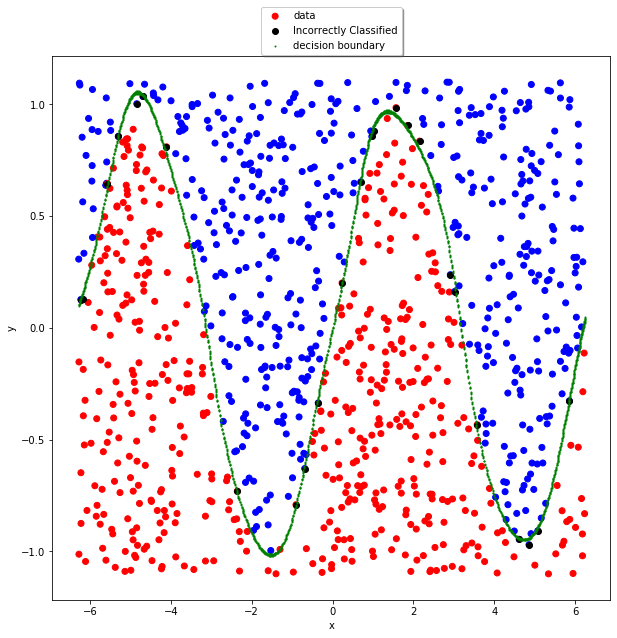

In [18]:
fig, ax1 = plt.subplots(figsize=[10, 10], nrows=1, ncols=1)

ax1.scatter(x_test, y_test, color=["r" if t == 0 else "b" for t in target_test.T], label="data")
ax1.scatter(incorrect['x'], incorrect['y'], color="black", label="Incorrectly Classified")
ax1.scatter(bounds_bias[:, 0], bounds_bias[:, 1], color="g", s=1, label="decision boundary")
ax1.legend(loc='upper center', bbox_to_anchor=(0.5, 1.1),
                ncol=1, fancybox=True, shadow=True)
ax1.set(xlabel='x', ylabel='y')
plt.savefig('SVM Q3 Test Set Cam.png',bbox_inches = 'tight');

In [19]:
from sklearn.metrics import confusion_matrix
confusion_matrix(target_test.T, svm_pred)

array([[489,   9],
       [ 16, 486]], dtype=int64)

In [ ]:
def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out